**DATA PRE-PROCESSING**

In [1]:
#import library
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#load data
df = pd.read_excel('/content/E Commerce Dataset.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [3]:
#melihat jumlah baris & kolom
df.shape

(5630, 20)

Dataset terdiri dari 5630 baris dan 20 kolom

In [4]:
#melihat informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Dataset mengadung variabel bersifat kategorik seperti PreferredLoginDevice, Gender, PreferedOrderCat, dll serta numerik seperti Tenure, WarehouseToHome, dll

Jumlah pada non-null count berbeda-beda tiap variabel menandakan terdapat missing value

In [5]:
#mengecek jumlah missing value
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Missing value terdapat pada variabel-variabel bertipe numerik. Missing value di impute menggunakan median dari masing-masing variabel

In [6]:
#mengganti missing value dengan median 
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

In [7]:
#mengecek kembali missing value
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                         False
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                False
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                 False
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear    False
CouponUsed                     False
OrderCount                     False
DaySinceLastOrder              False
CashbackAmount                 False
dtype: bool

In [8]:
#mengecek jumlah data duplikat
df.duplicated().sum()

0

Tidak ada data yang terduplikat

In [9]:
#melihat deskripsi data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Didapatkan ringkasan statistik dari data numerik seperti rata-rata Tenure atau waktu berlangganan customer adalah 10 bulan dan rentang jarak rumah customer dengan warehouse sejauh 5 - 127 km

In [10]:
#melihat skew data
df.skew()

CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.773278
CityTier                       0.735326
WarehouseToHome                1.678346
HourSpendOnApp                -0.040982
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.835439
CouponUsed                     2.630035
OrderCount                     2.276640
DaySinceLastOrder              1.273530
CashbackAmount                 1.149846
dtype: float64

Sebagian besar skew pada variabel numerik bernilai positif berarti nilai customer cenderung dibawah dari rata-rata variabel tersebut. Terdapat beberapa yang bernilai negatif

In [11]:
#menghapus kolom CusmtomerID
df.drop(['CustomerID'],axis=1, inplace=True)

#membagi data kategori dan numerik
cat = ['Churn', 'PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']
num = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

Variabel CustomerID dihapus karena tidak akan berpengaruh dalam pemodelan

In [12]:
rcParams['figure.figsize'] = 10, 15

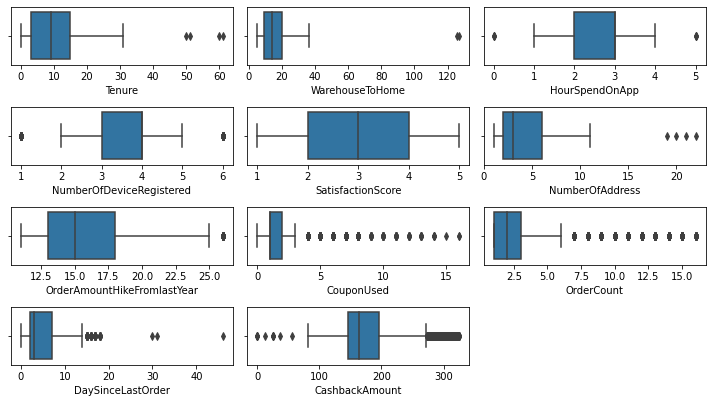

In [13]:
#memeriksa outlier dengan boxplot
for i,column in enumerate(num):
    plt.subplot(len(num), 3, i+1)
    sns.boxplot(data=df, x=column)
    plt.tight_layout()

Terdapat outlier dihampir semua variabel numerik. Outlier tidak dihapus melainkan digantikan dengan nilai minumum dan nilai maksimum masing-masing variabel

In [14]:
#mengganti outlier
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    return lr, ur

In [15]:
for column in df.columns:
    if df[column].dtype != 'object' and column != 'Churn': 
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

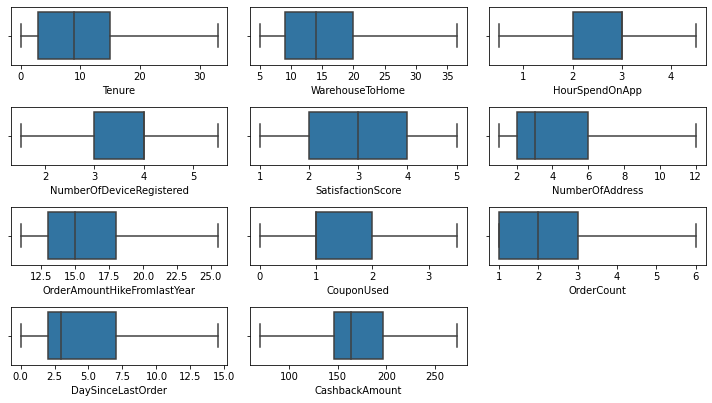

In [16]:
#memeriksa kembali outlier dengan boxplot
for i,column in enumerate(num):
    plt.subplot(len(num), 3, i+1)
    sns.boxplot(data=df, x=column)
    plt.tight_layout()

In [17]:
#melihat deskripsi data kembali
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.00000,0.00,0.00,0.0000,1.00000
Tenure,5630.0,10.118117,8.291334,0.00000,3.00,9.00,15.0000,33.00000
CityTier,5630.0,1.654707,0.915389,1.00000,1.00,1.00,3.0000,3.00000
WarehouseToHome,5630.0,15.534813,8.089328,5.00000,9.00,14.00,20.0000,36.50000
HourSpendOnApp,5630.0,2.934636,0.703826,0.50000,2.00,3.00,3.0000,4.50000
NumberOfDeviceRegistered,5630.0,3.695471,0.942015,1.50000,3.00,4.00,4.0000,5.50000
SatisfactionScore,5630.0,3.066785,1.380194,1.00000,2.00,3.00,4.0000,5.00000
NumberOfAddress,5630.0,4.207993,2.555111,1.00000,2.00,3.00,6.0000,12.00000
Complain,5630.0,0.284902,0.451408,0.00000,0.00,0.00,1.0000,1.00000
OrderAmountHikeFromlastYear,5630.0,15.671670,3.582823,11.00000,13.00,15.00,18.0000,25.50000


In [18]:
#melihat skew data kembali
df.skew()

Churn                          1.772843
Tenure                         0.692039
CityTier                       0.735326
WarehouseToHome                0.944524
HourSpendOnApp                -0.032308
NumberOfDeviceRegistered      -0.303717
SatisfactionScore             -0.142626
NumberOfAddress                0.965972
Complain                       0.953347
OrderAmountHikeFromlastYear    0.824247
CouponUsed                     0.532024
OrderCount                     1.148036
DaySinceLastOrder              0.818655
CashbackAmount                 0.903849
dtype: float64

**EDA, INSIGHTS & VISUALIZATION**

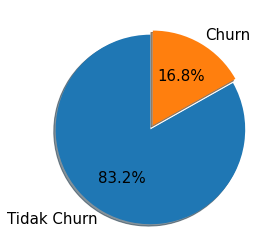

In [19]:
#proporsi churn 
plt.figure(figsize=(4,4))
plt.pie(df['Churn'].value_counts(sort = True), explode=(0.05,0), 
        labels= ['Tidak Churn', 'Churn'], autopct='%1.1f%%', shadow=True, 
        startangle=90, textprops={"fontsize":15})
plt.tight_layout()

Variabel Churn menjadi target dalam project ini. Value '0' pada variabel berarti customer tersebut tidak churn, sedangkan value '1' customer tersebut churn.

Dari grafik terlihat proporsi customer yang churn sebesar 16,8%, ini tidak seimbang (imbalance) dengan proporsi customer yang tidak churn. Untuk itu sebelum pembuatan model, proporsi akan disamakan dengan Undersample

In [20]:
rcParams['figure.figsize'] = 20, 30

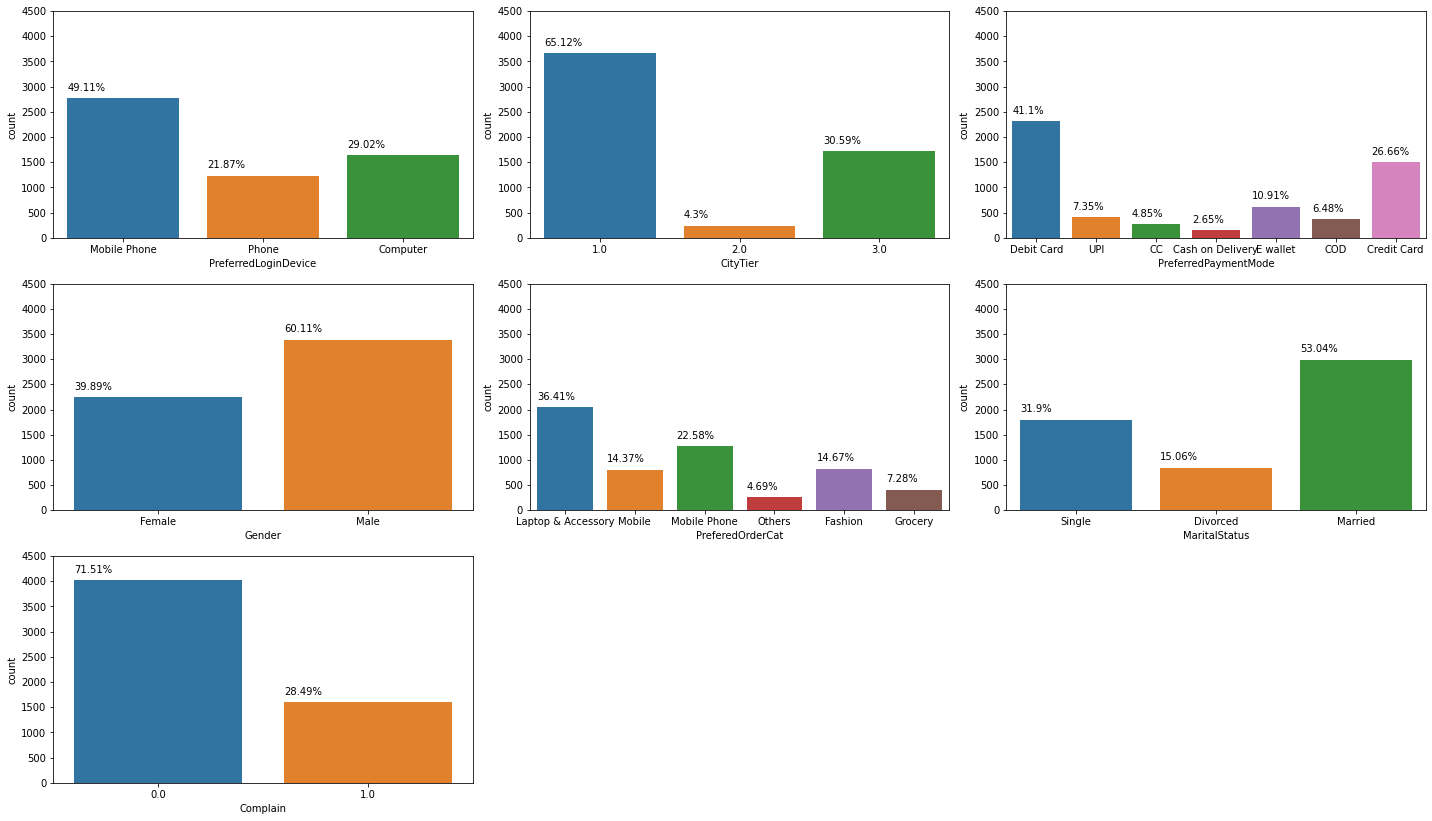

In [21]:
#perbandingan antar kategori pada variabel kategorik
for i,column in enumerate(cat[1:]):
    plt.subplot(len(cat), 3, i+1)                                   
    ax = sns.countplot(data=df, x=column)
    ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])

    totals = []
    for p in ax.patches:
      totals.append(p.get_height())
      total = sum(totals)
    for p in ax.patches:
        ax.text(p.get_x(), p.get_height()+150, \
            str(round((p.get_height()/total)*100, 2))+'%', fontsize=10)
    plt.tight_layout()

Dari grafik didapatkan informasi diantaranya :

*   Customer mengakses E-commerce melalui 3 perangkat (Mobile Phone, Phone, Computer), yang lebih banyak adalah Mobile Phone

*   Sebagian besar customer tinggal di kota tingkat 1 dan paling sedikit tinggal di tingkat 2

*   Lebih dari 60% customer membayar dengan kartu, baik debit maupun kredit

*   Lebih banyak customer laki-laki daripada perempuan

*   Barang yang paling sering dibeli adalah eletronik seperti laptop dan mobile phone

*   Lebih dari 50% customer berstatus menikah

*   28% customer pernah komplain kepada E-commerce


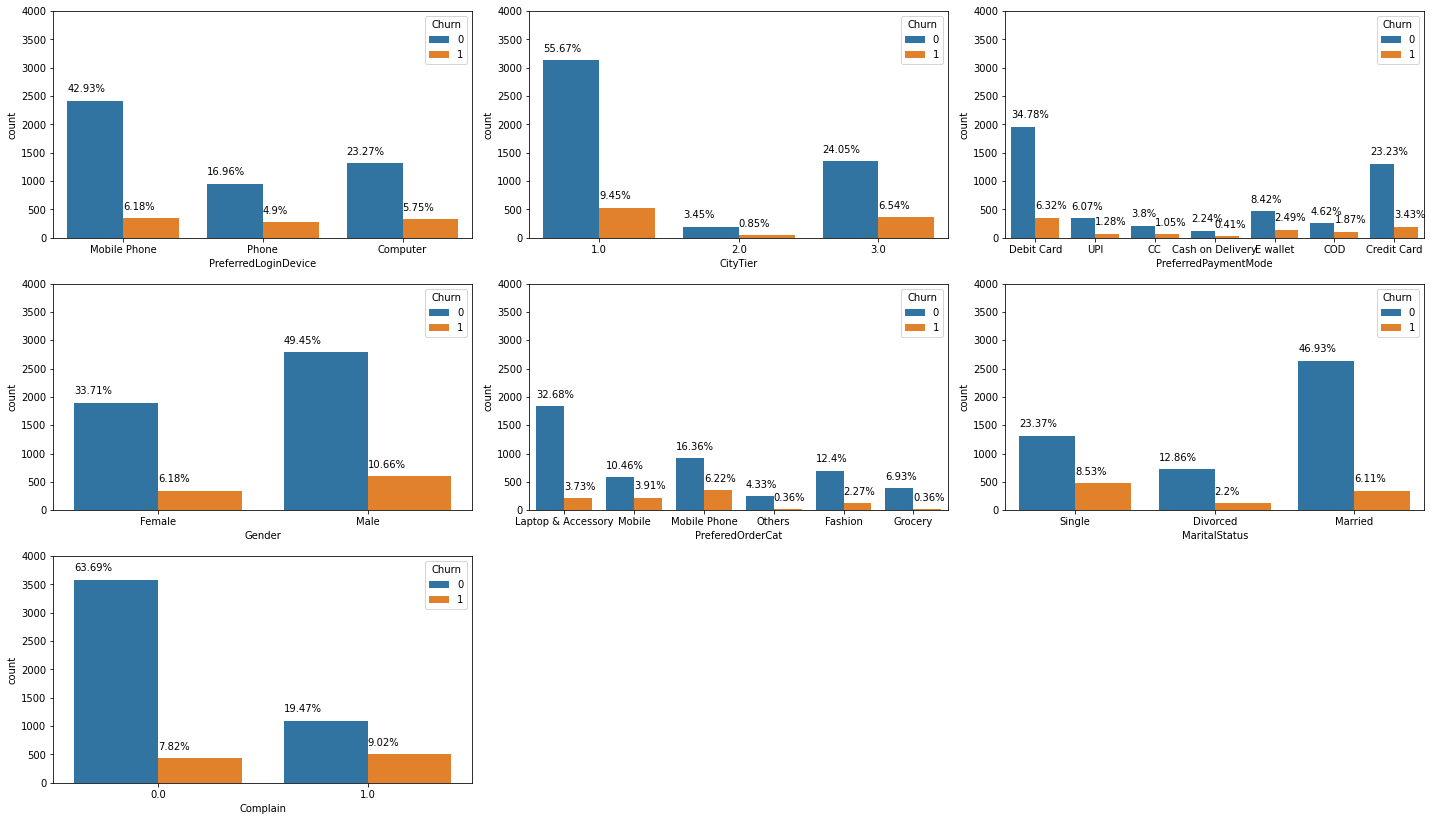

In [22]:
#perbandingan churn terhadap data kategorik
for i,column in enumerate(cat[1:]):
    plt.subplot(len(cat), 3, i+1)
    ax = sns.countplot(data=df, x=column, hue='Churn')
    ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000])

    totals = []
    for p in ax.patches:
      totals.append(p.get_height())
      total = sum(totals)
    for p in ax.patches:
        ax.text(p.get_x(), p.get_height()+150, \
            str(round((p.get_height()/total)*100, 2))+'%', fontsize=10)
    plt.tight_layout()

Dari grafik didapatkan informasi ada kecenderungan bahwa customer untuk churn adalah customer dengan akses melalui Mobile Phone, customer yang tinggal kota 1, customer yang menggunakan Debit Card, customer laki-laki, customer yang membeli Mobile Phone, customer yang belum punya pasangan, dan customer yang pernah complain






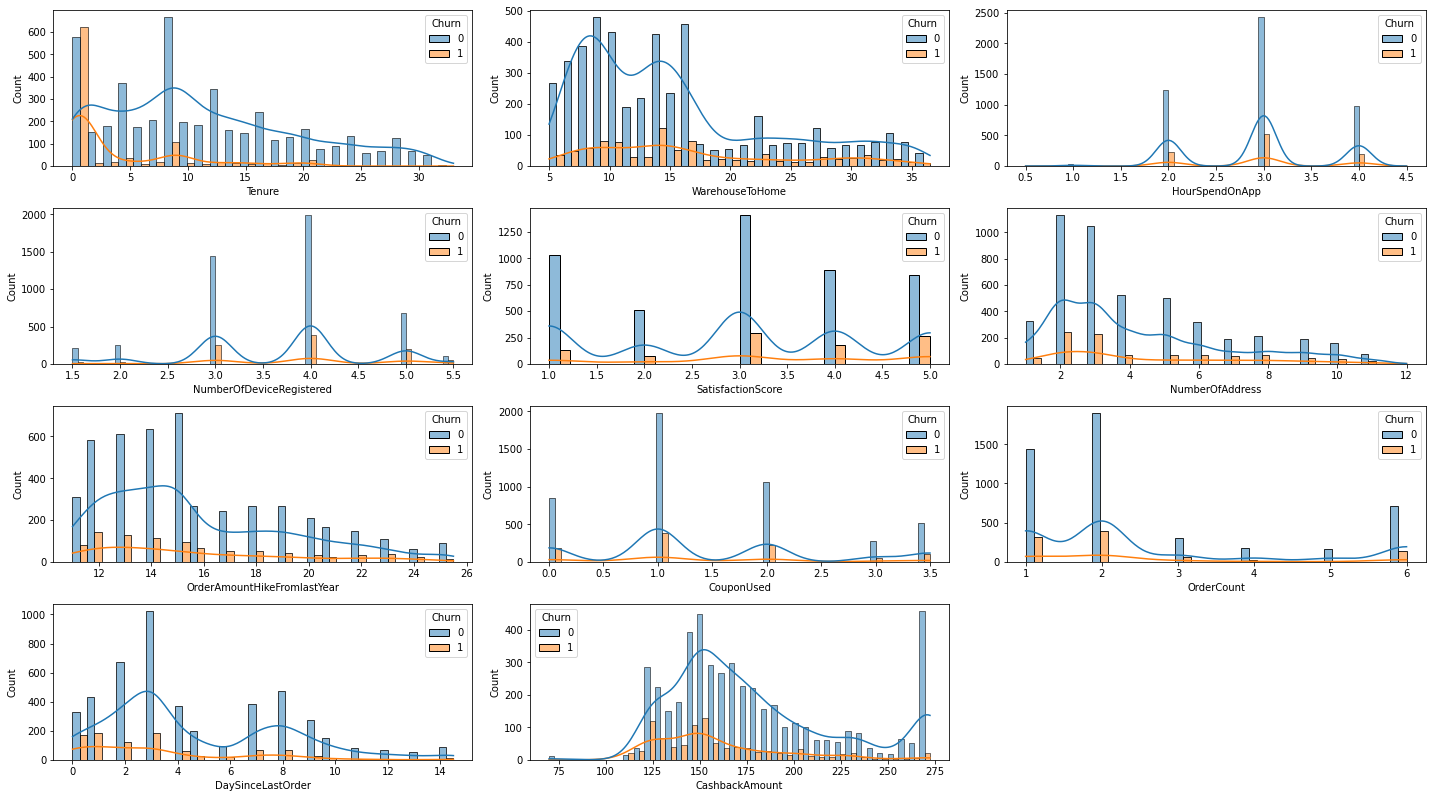

In [23]:
#histplot dari data numerik
for i,column in enumerate(num):
    plt.subplot(len(num), 3, i+1)
    sns.histplot(data=df, x=column, kde=True, hue='Churn', multiple='dodge')
    plt.tight_layout()

Dari grafik didapatkan informasi diantaranya :
*   Untuk Tenure terdapat banyak customer yang churn pada 3 bulan pertama (makin lama berlangganan kecil kemungkinan churn)

*   Untuk WarehouseToHome customer yang berjarak < 20 km lebih cenderung churn dibandingkan yang > 20 km (jarak jauh bukan alasan atau faktor customer untuk churn)

*   Untuk HourSpendOnApp banyak customer yang churn setelah menjelajah selama 3 jam

*   Untuk NumberOfDeviceRegistered lebih banyak customer yang churn dengan 4 perangkat

*   Untuk SatisfactionScore customer yang churn cenderung memberi skor kepuasan > 3

*   Untuk CouponUsed & OrderCount customer yang hanya menggunakan 1 kupon dan jumlah pesanan < 3 cenderung untuk churn

*   Untuk DaySinceLastOrder customer yang baru memesan barang 4 hari yang lalu banyak yang memutuskan churn

*   Untuk CashbackAmount customer yang mendapat cashback kurang dari 175 mempunyai persentase besar untuk churn


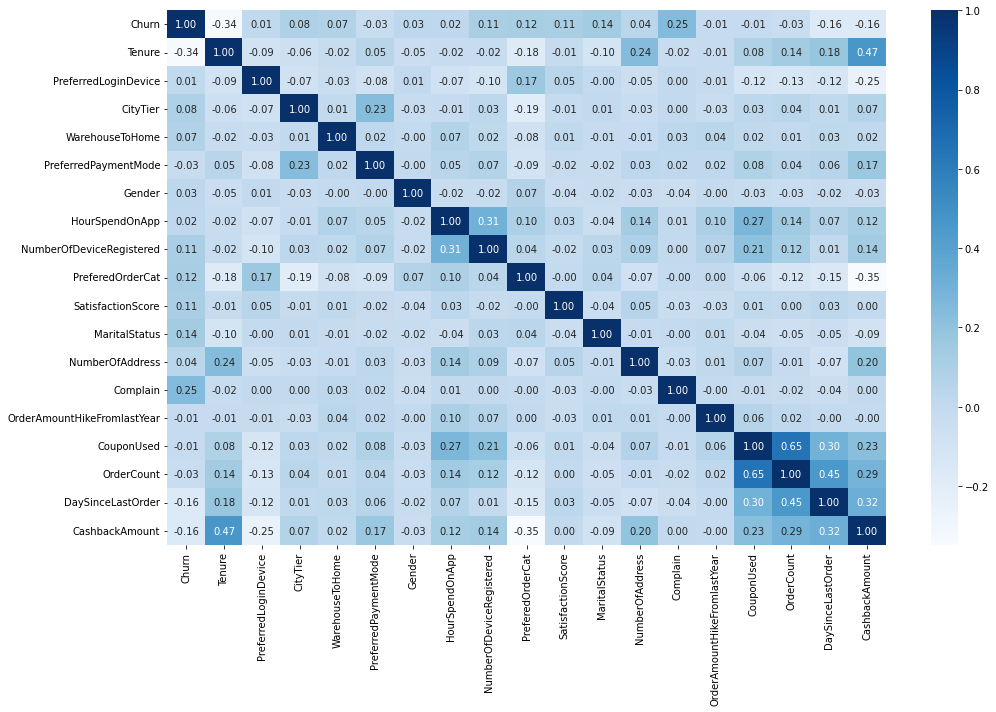

In [24]:
#melihat korelasi antar variabel
df_onehot = df.copy()
for i in cat:
  df_onehot[i] = df_onehot[i].astype('category').cat.codes
plt.figure(figsize=(15,10))
sns.heatmap(df_onehot.corr(), cmap="Blues", annot=True, fmt=".2f")
plt.tight_layout()

Dari grafik didapatkan informasi variabel yang memiliki korelasi kuat terhadap Churn adalah Complain meskipun hanya 0.25. Ini memungkinkan karena hanya sekitar 20% saja customer yang masih berlangganan setelah sebelumnya komplain.

Untuk kolelasi antar feature yang paling kuat adalah OrderCount dan CouponUsed yang mencapai 0.65 dan diikuti oleh Tenure dan CashbackAmount sebesar 0.47


**MODELLING & EVALUATION**

In [25]:
#import library
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, recall_score, confusion_matrix

In [26]:
#encode variabel kategori
df = df.join(pd.get_dummies(df['PreferredLoginDevice'], prefix = 'PLD'))
df = df.join(pd.get_dummies(df['PreferredPaymentMode'], prefix = 'PPM'))
df = df.join(pd.get_dummies(df['Gender'], prefix = 'GDR'))
df = df.join(pd.get_dummies(df['PreferedOrderCat'], prefix = 'POC'))
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix = 'MRT'))

df.drop(columns = ['PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat', 'MaritalStatus'], axis=1, inplace=True)
df.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,GDR_Male,POC_Fashion,POC_Grocery,POC_Laptop & Accessory,POC_Mobile,POC_Mobile Phone,POC_Others,MRT_Divorced,MRT_Married,MRT_Single
0,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,1,0,0,0,0,0,1
1,1,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,1,0,0,0,1,0,0,0,0,1
2,1,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,1,0,0,0,1,0,0,0,0,1
3,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,1,0,0,1,0,0,0,0,0,1
4,1,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,...,1,0,0,0,1,0,0,0,0,1


In [27]:
#melihat jumlah baris dan kolom
df.shape

(5630, 35)

In [28]:
#split data train dan test
X = df.drop('Churn', axis = 1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, random_state=12)
X_train.shape, X_test.shape

((3940, 34), (1690, 34))

In [29]:
#melihat feature train
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,GDR_Male,POC_Fashion,POC_Grocery,POC_Laptop & Accessory,POC_Mobile,POC_Mobile Phone,POC_Others,MRT_Divorced,MRT_Married,MRT_Single
203,6.0,3.0,16.0,2.0,4.0,2.0,4.0,0.0,14.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4040,1.0,3.0,9.0,3.0,2.0,3.0,2.0,0.0,15.0,1.0,...,0,0,0,1,0,0,0,0,0,1
5020,1.0,1.0,10.0,3.0,5.0,1.0,2.0,1.0,12.0,1.0,...,1,0,0,0,0,1,0,0,1,0
4175,3.0,1.0,28.0,3.0,2.0,5.0,3.0,0.0,12.0,3.5,...,0,1,0,0,0,0,0,0,1,0
4022,1.0,1.0,31.0,4.0,5.0,1.0,3.0,1.0,25.0,2.0,...,1,0,0,0,0,1,0,0,0,1


In [30]:
#proporsi churn pada train
pd.Series(y_train).value_counts()

0    3257
1     683
Name: Churn, dtype: int64

In [31]:
#undersampling 
undersample = RandomUnderSampler()
X_train, y_train = undersample.fit_resample(X_train, y_train)
pd.Series(y_train).value_counts()

0    683
1    683
Name: Churn, dtype: int64

REGRESI LOGISTIK

In [32]:
#MODEL REGRESI LOGISTIK
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [33]:
y_pred_logreg = logreg.predict(X_test)

In [34]:
#hasil model regresi logistik
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.96      0.79      0.86      1425
           1       0.42      0.80      0.55       265

    accuracy                           0.79      1690
   macro avg       0.69      0.80      0.71      1690
weighted avg       0.87      0.79      0.81      1690



In [35]:
print('Skor Recall logreg: {0:0.4f}'. format(recall_score(y_test, y_pred_logreg)))

Skor Recall logreg: 0.8038


In [36]:
print('Training set logreg score: {:.4f}'.format(logreg.score(X_train, y_train)))
print('Test set logreg score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set logreg score: 0.8199
Test set logreg score: 0.7917


XGBOOST

In [37]:
#MODEL XGBOOST
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [38]:
y_pred_xgb = xgb.predict(X_test)

In [39]:
#hasil model xgboost
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1425
           1       0.51      0.87      0.64       265

    accuracy                           0.85      1690
   macro avg       0.74      0.86      0.77      1690
weighted avg       0.90      0.85      0.86      1690



In [40]:
print('Skor Recall xgb: {0:0.4f}'. format(recall_score(y_test, y_pred_xgb)))

Skor Recall xgb: 0.8679


In [41]:
print('Training set xgb score: {:.4f}'.format(xgb.score(X_train, y_train)))
print('Test set xgb score: {:.4f}'.format(xgb.score(X_test, y_test)))

Training set xgb score: 0.9063
Test set xgb score: 0.8467


MODEL TERBAIK

In [42]:
#tuning hyperparameter model random forest
parameters = {
    'n_estimators': [100, 200, 300, 400, 500]}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=12)

xgb_grid = GridSearchCV(estimator = xgb,  
                           param_grid = parameters,
                           scoring = 'recall',
                           cv=skf,
                           verbose=0)

xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=XGBClassifier(),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             scoring='recall')

In [43]:
print(xgb_grid.best_estimator_)
print('{:.4f}\n\n'.format(xgb_grid.best_score_))

XGBClassifier(n_estimators=500)
0.8887




In [44]:
y_pred_xgb_grid = xgb_grid.predict(X_test)

In [45]:
#hasil model random forest grid
print(classification_report(y_test, y_pred_xgb_grid))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1425
           1       0.60      0.92      0.72       265

    accuracy                           0.89      1690
   macro avg       0.79      0.90      0.83      1690
weighted avg       0.92      0.89      0.90      1690



In [46]:
print('Skor Recall xgb_grid: {0:0.4f}'. format(recall_score(y_test, y_pred_xgb_grid)))

Skor Recall xgb_grid: 0.9170


In [47]:
print('Training set xgb_grid score: {:.4f}'.format(xgb_grid.score(X_train, y_train)))
print('Test set xgb_grid score: {:.4f}'.format(xgb_grid.score(X_test, y_test)))

Training set xgb_grid score: 0.9985
Test set xgb_grid score: 0.9170


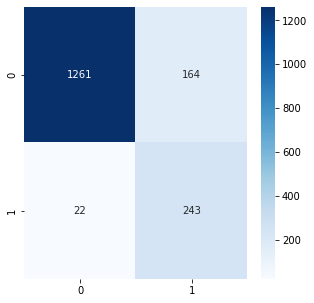

In [48]:
#confusion matrix dari model terbaik
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_grid), cmap="Blues", annot = True, fmt = "2d")

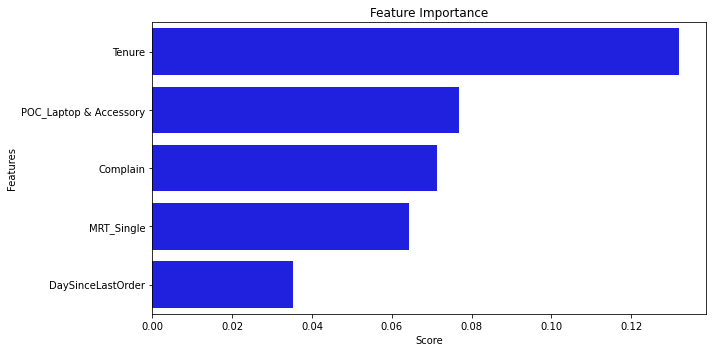

In [49]:
#melihat variabel yang berpengaruh dari model terbaik
feat_importances = pd.Series(xgb_grid.best_estimator_.feature_importances_, index=X.columns).sort_values(ascending = False).head()
plt.figure(figsize = (10,5))
sns.barplot(x = feat_importances, y = feat_importances.index, color='Blue')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.tight_layout()